#                                 SUPERMARKET SALES ANALYSIS

# 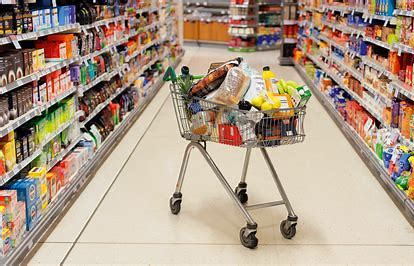

# TABLE OF CONTEXT
1. Neccesary libraries
2. Data Frame
3. Revenue generated- per day, per month and total
4. Number of items sold
5. Average Profit margin
6. Top selling products
7. Average purchase amount per customer
8. Most and Least preferred goods
9. Common payment method
10. Overall customer satisfaction
11. General analysis- City, Branch, Customer type, Gender


NECCESARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

DATA FRAME

The supermarket_sales.csv file, consists of data for a daily sales at a local supermarket, this is from 2019-02=-01 to 2019-04-01. 

In [9]:
df = pd.read_csv("supermarket_sales.csv")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [8]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

There are no null values

# TOTAL REVENUE GENERATED

# Total Revenue per Day

In [6]:
#converting date column to a datetime object
df['Date']=pd.to_datetime(df['Date'])
df['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [8]:
#grouping by date and summing the gross income
daily_revenue=df.groupby('Date')['gross income'].sum()
daily_revenue

Date
2019-01-01    225.9610
2019-01-02     92.6430
2019-01-03     98.9585
2019-01-04     77.3185
2019-01-05    168.4135
                ...   
2019-03-26     93.4530
2019-03-27    138.2295
2019-03-28    106.1620
2019-03-29    191.5830
2019-03-30    213.6695
Name: gross income, Length: 89, dtype: float64

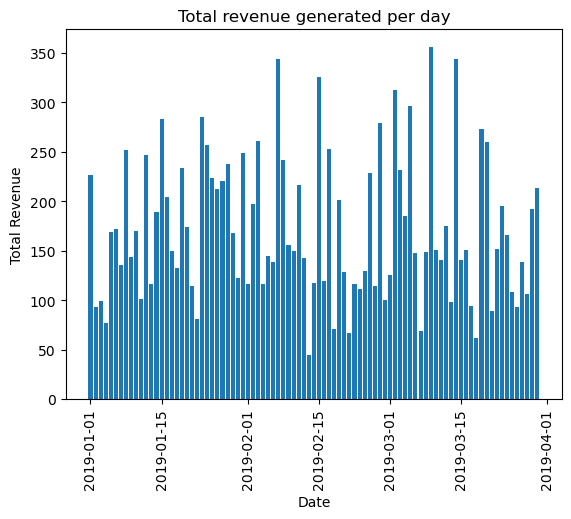

In [11]:
plt.bar(daily_revenue.index,daily_revenue.values)
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('Total revenue generated per day')
plt.xticks(rotation=90)
plt.show()

# Total Revenue per Month

In [23]:
monthly_revenue=df.groupby(pd.Grouper(key='Date',freq='M'))['gross income'].sum()
monthly_revenue

Date
2019-01-31    5537.708
2019-02-28    4629.494
2019-03-31    5212.167
Freq: M, Name: gross income, dtype: float64

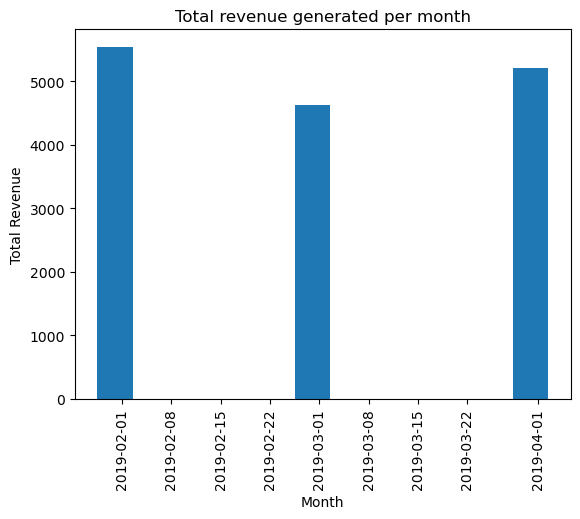

In [26]:
plt.bar(monthly_revenue.index,monthly_revenue.values,width=5.0)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Total revenue generated per month')
plt.xticks(rotation=90)
plt.show()

The month of January has the highest sales, followed by march then february.

# Total Revenue

In [136]:
df['gross income'].sum()

15379.368999999999

The total revenue earned by the supermarket for the two months(2019-02=-01 to 2019-04-01) is 15397.37.

# Number of items sold

In [112]:
df['Quantity'].sum()

5510

# Average Purchase amount per customer

In [137]:
average_purchase=df.groupby('Invoice ID')['Total'].mean()
average_purchase

Invoice ID
101-17-6199    336.5565
101-81-4070    131.9220
102-06-2002    132.5625
102-77-2261    480.0285
105-10-6182     45.1080
                 ...   
894-41-5205    362.7120
895-03-6665    345.0195
895-66-0685     56.9520
896-34-0956     22.3860
898-04-2717    721.9800
Name: Total, Length: 1000, dtype: float64

# Top 10 average purchase amount per customer

In [56]:
ave_purchase=df.groupby('Invoice ID')['Total'].mean().nlargest(10)
ave_purchase

Invoice ID
860-79-0874    1042.650
687-47-8271    1039.290
283-26-5248    1034.460
751-41-9720    1023.750
303-96-2227    1022.490
744-16-7898    1022.385
271-88-8734    1020.705
234-65-2137    1003.590
554-42-2417    1002.120
325-77-6186     951.825
Name: Total, dtype: float64

[Text(0.5, 1.0, 'Top 10 average purchase amount per customer')]

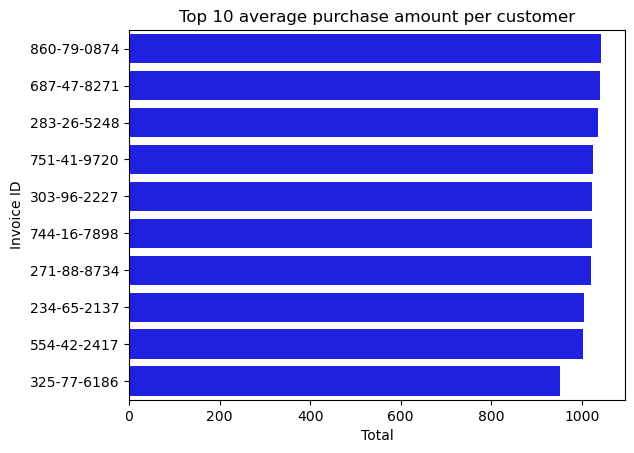

In [132]:
sns.barplot(y=ave_purchase.index,x=ave_purchase,color='blue').set(title='Top 10 average purchase amount per customer')

# Bottom 10 average purchase amount per customer

In [59]:
low_ave_purchase=df.groupby('Invoice ID')['Total'].mean().nsmallest(10)
low_ave_purchase

Invoice ID
784-21-9238    10.6785
308-39-1707    12.6945
279-62-1445    13.1670
192-98-7397    13.4190
236-86-3015    14.6790
490-29-1201    16.1070
778-71-5554    16.2015
593-08-5916    16.2750
489-64-4354    17.0940
559-61-5987    18.6375
Name: Total, dtype: float64

[Text(0.5, 1.0, 'Bottom 10 average purchase amount per customer')]

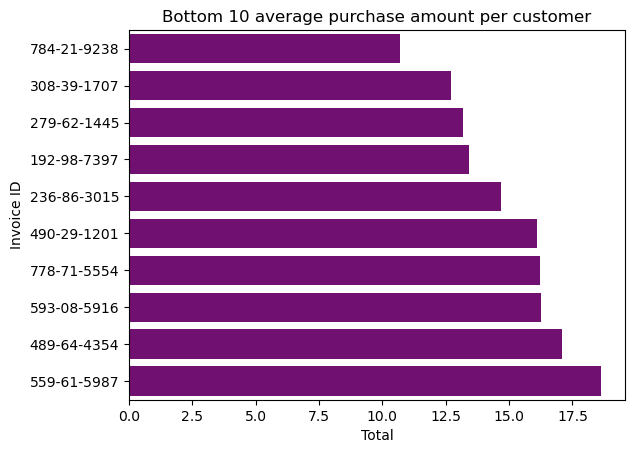

In [138]:
sns.barplot(y=low_ave_purchase.index,x=low_ave_purchase,color='purple').set(title='Bottom 10 average purchase amount per customer')

# Average purchase per customer in terms of type of the customer

In [38]:
average_purchase=df.groupby('Customer type')['Total'].mean()
average_purchase

Customer type
Member    327.791305
Normal    318.122856
Name: Total, dtype: float64

# Product line(Best to Least)

In [17]:
top_products=df.groupby('Product line')['Quantity'].sum().nlargest(10)
top_products

Product line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: Quantity, dtype: int64

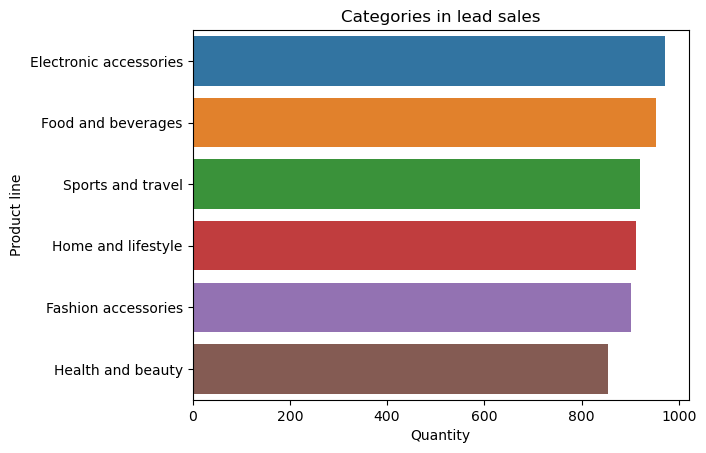

In [19]:
sns.barplot(y=top_products.index,x=top_products).set(title='Categories in lead sales');

From the data, electronic accessories are the top selling products, at 971. On the other hand, the health and beauty products are the least sold at 854. There are no major differences in the amount of goods sold in different categories, as seen from the bar chart.

# Common payment method

In [118]:
payments=df.groupby('Payment')['Invoice ID'].count()
payments

Payment
Cash           344
Credit card    311
Ewallet        345
Name: Invoice ID, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

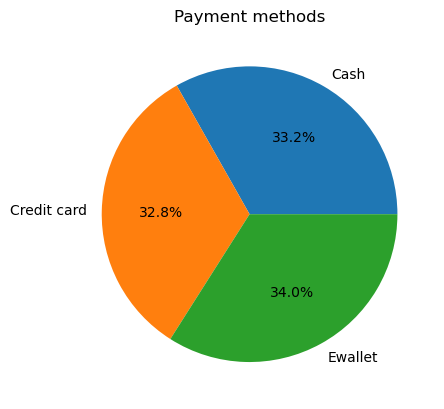

In [127]:
fig,ax=plt.subplots()
ax.pie(payments,labels=('Cash','Credit card','Ewallet'),autopct='%1.1f%%')
ax.set_title('Payment methods')
plt.show

The most common payment method is through the Ewallet at 34.0%, followed by Cash at 33.2% then the Credit cards at 32.8%

# Overall Customer Satisfaction

In [105]:
df['Rating'].sum()/len(df['Rating'])

6.9727

From the customers rating, the supermarket is averagely rated at a 6.9727(approximatelt 7) on a scale of 1 to 10, 1 being poor and 10 being excellent.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("supermarket_sales.csv")
df

# GENERAL ANALYSIS

# Branch analysis

In [122]:
branch=df.groupby('Branch')['Invoice ID'].count()
branch

Branch
A    340
B    332
C    328
Name: Invoice ID, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

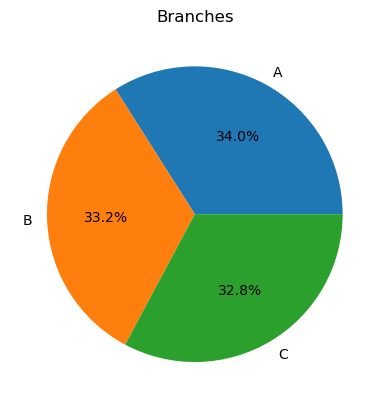

In [128]:
fig,ax=plt.subplots()
ax.pie(branch,labels=('A','B','C'),autopct='%1.1f%%')
ax.set_title('Branches')
plt.show

The supermarket has three branches and in the two month analysis, branch A performed better than B and C, in terms of the number of customers. Branch A is at 34.0%, branch B is at 33.2% and branch C at 32.8%.

# Branch vs Total

In [142]:
branch_total=df.groupby('Branch')['Total'].sum()
branch_total

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64

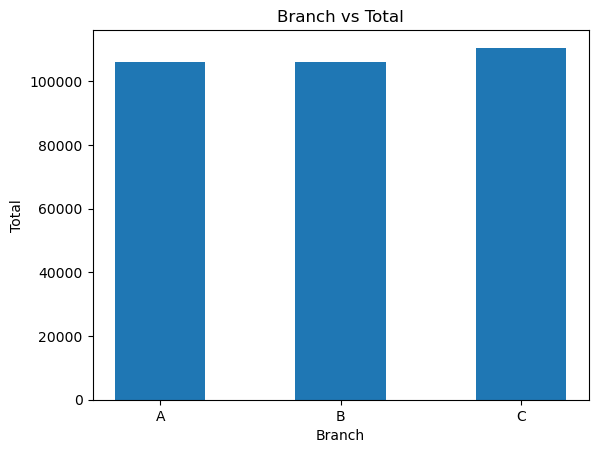

In [146]:
plt.bar(branch_total.index,branch_total.values,width=0.5)
plt.xlabel('Branch')
plt.ylabel('Total')
plt.title('Branch vs Total')
plt.show()

The branches have minute differences in the amount they are making. Branch C leads followed by A then B.

# City Analysis

In [124]:
city=df.groupby('City')['Invoice ID'].count()
city

City
Mandalay     332
Naypyitaw    328
Yangon       340
Name: Invoice ID, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

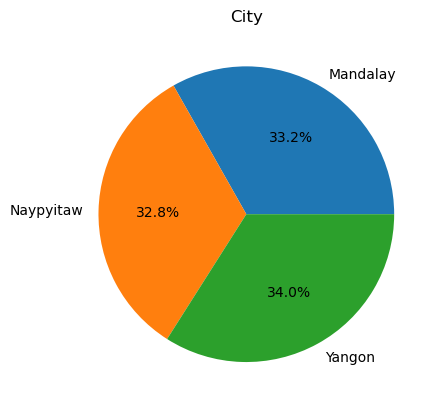

In [131]:
fig,ax=plt.subplots()
ax.pie(city,labels=('Mandalay','Naypyitaw','Yangon'),autopct='%1.1f%%')
ax.set_title('City')
plt.show

The supermarket operates in three cities. We have Yangon leading in the number of customers shopping there, followed by Mandalay and lastly Naypyitaw

In [148]:
City_total=df.groupby('City')['Total'].sum()
City_total

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64

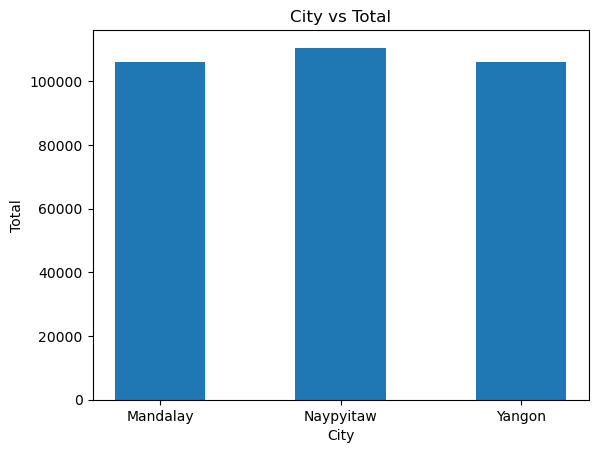

In [149]:
plt.bar(City_total.index,City_total.values,width=0.5)
plt.xlabel('City')
plt.ylabel('Total')
plt.title('City vs Total')
plt.show()

The cities have minute differences in the amount they are making. Naypyitaw leads followed by Yangon then Mandalay.

# Customer type analysis

In [123]:
customer=df.groupby('Customer type')['Invoice ID'].count()
customer

Customer type
Member    501
Normal    499
Name: Invoice ID, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

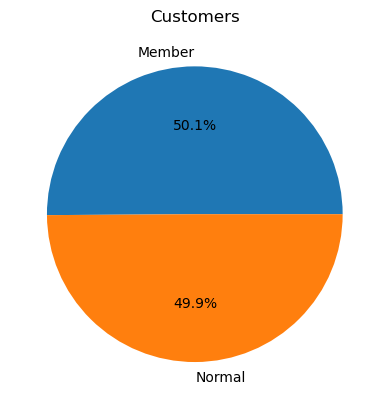

In [130]:
fig,ax=plt.subplots()
ax.pie(customer,labels=('Member','Normal'),autopct='%1.1f%%')
ax.set_title('Customers')
plt.show

There is a slight difference between the Member customers and the Normal customers. The member customers are 501(50.1%) and the normal customers are 499(4.99%) out of the 1000 total customers for the two months.

# Gender

In [151]:
gender=df.groupby('Gender')['Invoice ID'].count()
gender

Gender
Female    501
Male      499
Name: Invoice ID, dtype: int64

501 ouf of 1000 customers who shopped at the supermarket are Female, while 499 are Male.

# Report compiled by:
1. Lyndra Melanie
2. Ian Mwangi
3. Habakkuk Mengo
4. Mercyline Boit
5. Cynthia Wanjiru